In [1]:
#Support Vector Machine

In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv("mushroom.csv")
df

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,265,convex,grooves,green,yes,fishy,notched,close,narrow,pink,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,411,bell,smooth,white,no,pungent,free,close,narrow,orange,...,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199


In [2]:
#EDA

In [3]:
df.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [5]:
df.shape

(2000, 26)

In [6]:
df.isnull().sum()

Unnamed: 0                  0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64

In [7]:
print("\nUnique values in each column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()}")


Unique values in each column:
Unnamed: 0: 976
cap_shape: 5
cap_surface: 4
cap_color: 9
bruises: 2
odor: 9
gill_attachment: 4
gill_spacing: 3
gill_size: 2
gill_color: 12
stalk_shape: 2
stalk_root: 7
stalk_surface_above_ring: 4
stalk_surface_below_ring: 4
stalk_color_above_ring: 9
stalk_color_below_ring: 9
veil_type: 2
veil_color: 4
ring_number: 3
ring_type: 8
spore_print_color: 9
population: 6
habitat: 7
class: 2
stalk_height: 973
cap_diameter: 976


In [8]:
 df.columns.tolist()

['Unnamed: 0',
 'cap_shape',
 'cap_surface',
 'cap_color',
 'bruises',
 'odor',
 'gill_attachment',
 'gill_spacing',
 'gill_size',
 'gill_color',
 'stalk_shape',
 'stalk_root',
 'stalk_surface_above_ring',
 'stalk_surface_below_ring',
 'stalk_color_above_ring',
 'stalk_color_below_ring',
 'veil_type',
 'veil_color',
 'ring_number',
 'ring_type',
 'spore_print_color',
 'population',
 'habitat',
 'class',
 'stalk_height',
 'cap_diameter']

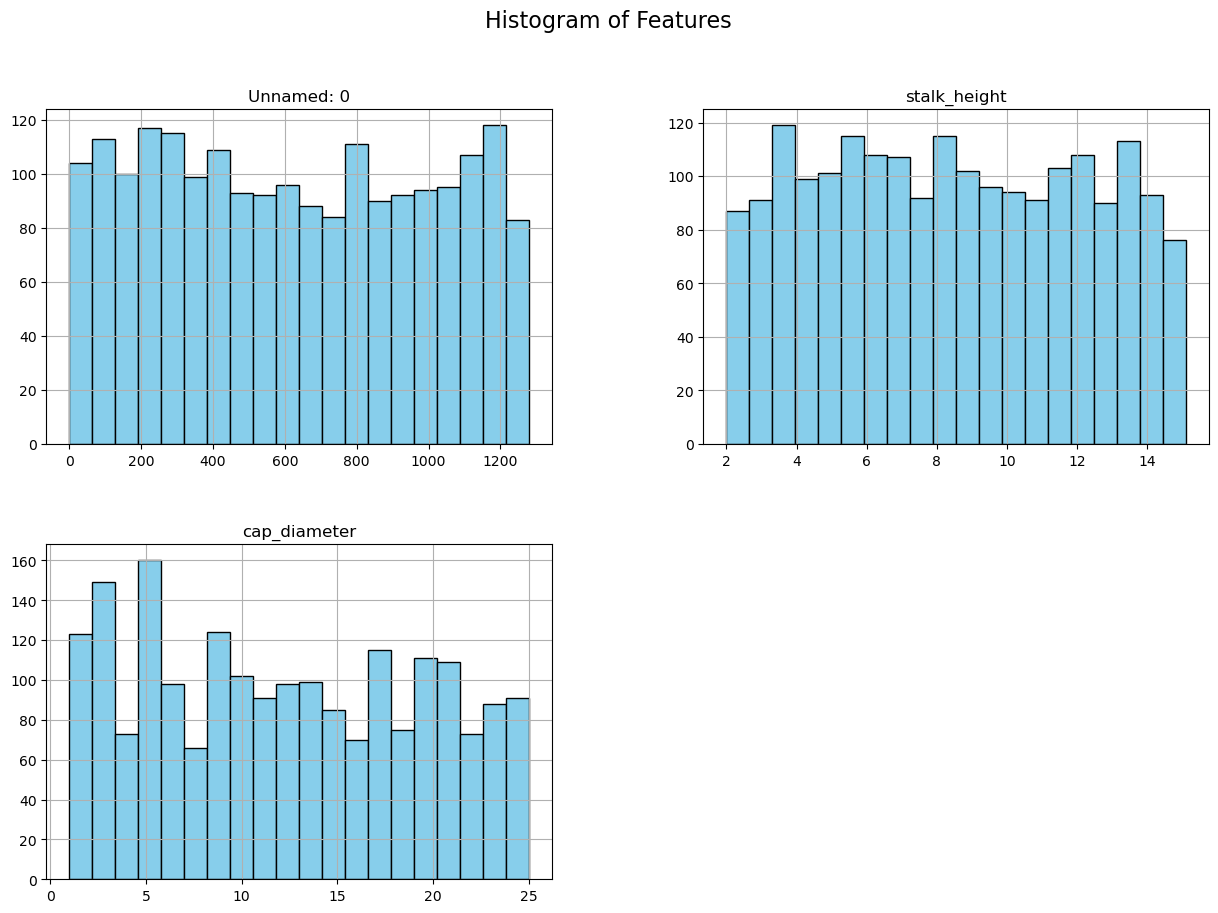

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
df.hist(figsize=(15, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Histogram of Features", fontsize=16)
plt.show()

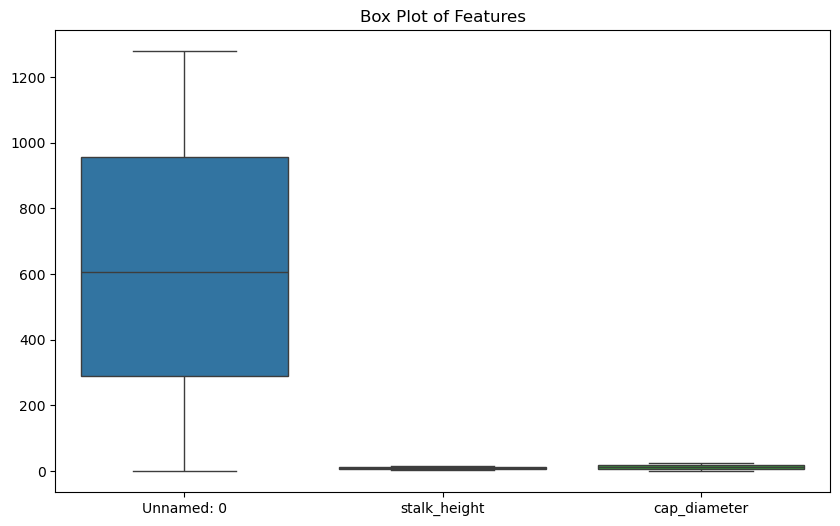

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title("Box Plot of Features")
plt.show()

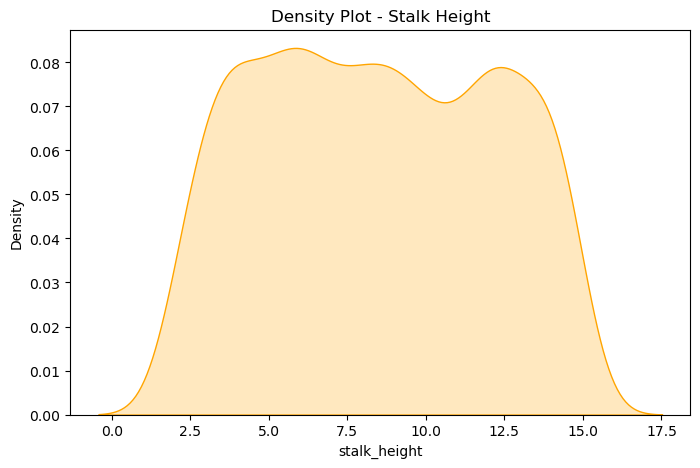

In [11]:
from sklearn.preprocessing import LabelEncoder
plt.figure(figsize=(8, 5))
sns.kdeplot(df['stalk_height'], fill=True, color='orange')
plt.title("Density Plot - Stalk Height")
plt.show()

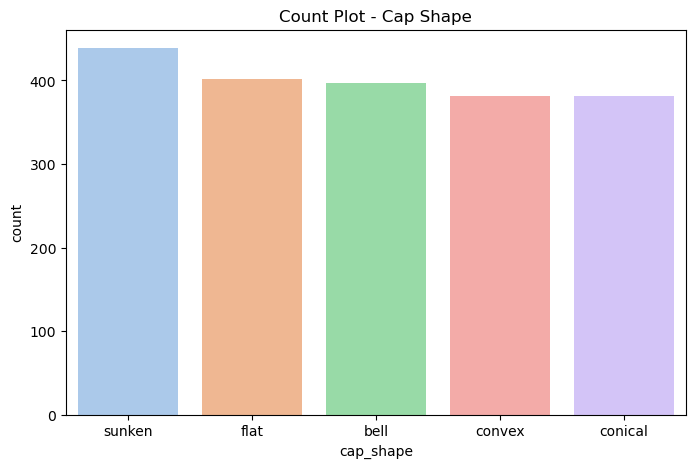

In [12]:
plt.figure(figsize=(8, 5))
sns.countplot(x='cap_shape', hue='cap_shape', data=df, palette='pastel', legend=False)
plt.title("Count Plot - Cap Shape")
plt.show()

In [13]:
df_encoded = df.copy()
le = LabelEncoder()

for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object':
        df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))

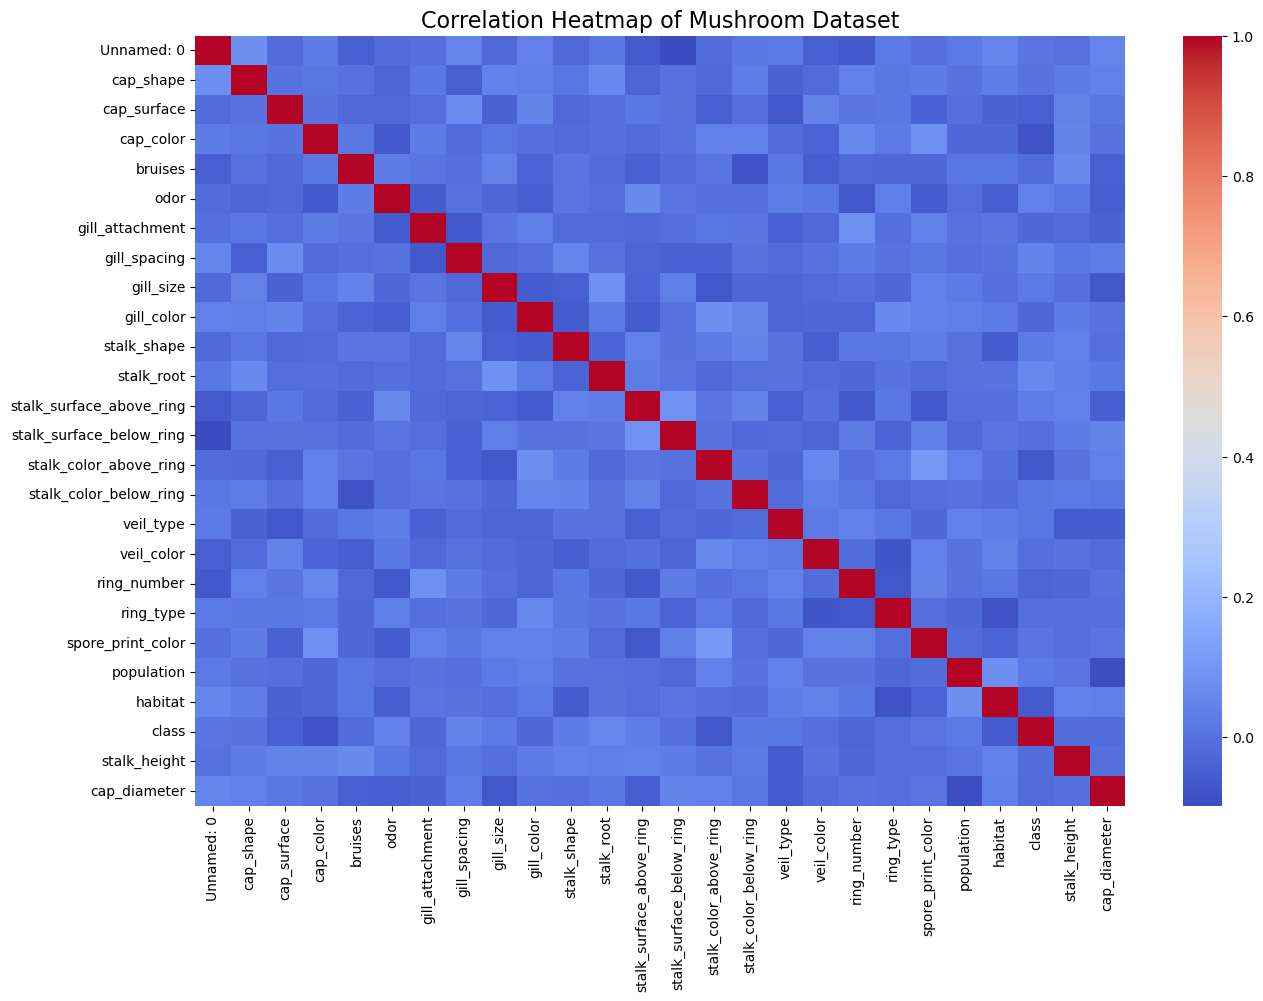

In [14]:
corr_matrix = df_encoded.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap of Mushroom Dataset", fontsize=16)
plt.show()

In [15]:
target_corr = corr_matrix['class'].sort_values(ascending=False)
target_corr

class                       1.000000
stalk_root                  0.054233
gill_spacing                0.046505
odor                        0.039536
stalk_surface_above_ring    0.031007
stalk_shape                 0.024023
gill_size                   0.019858
population                  0.019405
stalk_color_below_ring      0.016777
veil_type                   0.013094
spore_print_color           0.006375
Unnamed: 0                  0.005902
cap_shape                   0.001140
stalk_surface_below_ring   -0.004139
veil_color                 -0.007517
ring_type                  -0.008467
stalk_height               -0.013655
bruises                    -0.015498
cap_diameter               -0.019707
gill_color                 -0.028083
gill_attachment            -0.028194
ring_number                -0.029246
cap_surface                -0.046409
habitat                    -0.061998
stalk_color_above_ring     -0.071585
cap_color                  -0.078029
Name: class, dtype: float64

In [16]:
#Data Preprocessing

In [17]:
df_encoded = df.copy()
le = LabelEncoder()
for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object':
        df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))

In [18]:
df_encoded.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,4,2,7,0,1,1,2,0,7,...,0,0,2,6,3,1,5,1,14.276173,5.054983
1,1037,4,0,6,0,1,3,1,1,3,...,1,0,2,6,1,2,5,0,3.952715,19.068319
2,309,3,1,5,1,4,1,1,0,8,...,1,3,2,6,6,0,5,1,9.054265,7.205884
3,282,0,2,4,1,3,3,0,0,6,...,0,3,2,0,4,1,0,1,5.226499,20.932692
4,820,3,3,8,1,5,2,1,1,6,...,1,2,0,4,8,1,4,1,14.037532,12.545245


In [19]:
df_encoded.dtypes

Unnamed: 0                    int64
cap_shape                     int64
cap_surface                   int64
cap_color                     int64
bruises                       int64
odor                          int64
gill_attachment               int64
gill_spacing                  int64
gill_size                     int64
gill_color                    int64
stalk_shape                   int64
stalk_root                    int64
stalk_surface_above_ring      int64
stalk_surface_below_ring      int64
stalk_color_above_ring        int64
stalk_color_below_ring        int64
veil_type                     int64
veil_color                    int64
ring_number                   int64
ring_type                     int64
spore_print_color             int64
population                    int64
habitat                       int64
class                         int64
stalk_height                float64
cap_diameter                float64
dtype: object

In [20]:
from sklearn.model_selection import train_test_split
X = df_encoded.drop('class', axis=1)   
y = df_encoded['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [21]:
X_train.shape

(1600, 25)

In [22]:
X_test.shape

(400, 25)

In [23]:
#Data Visualization

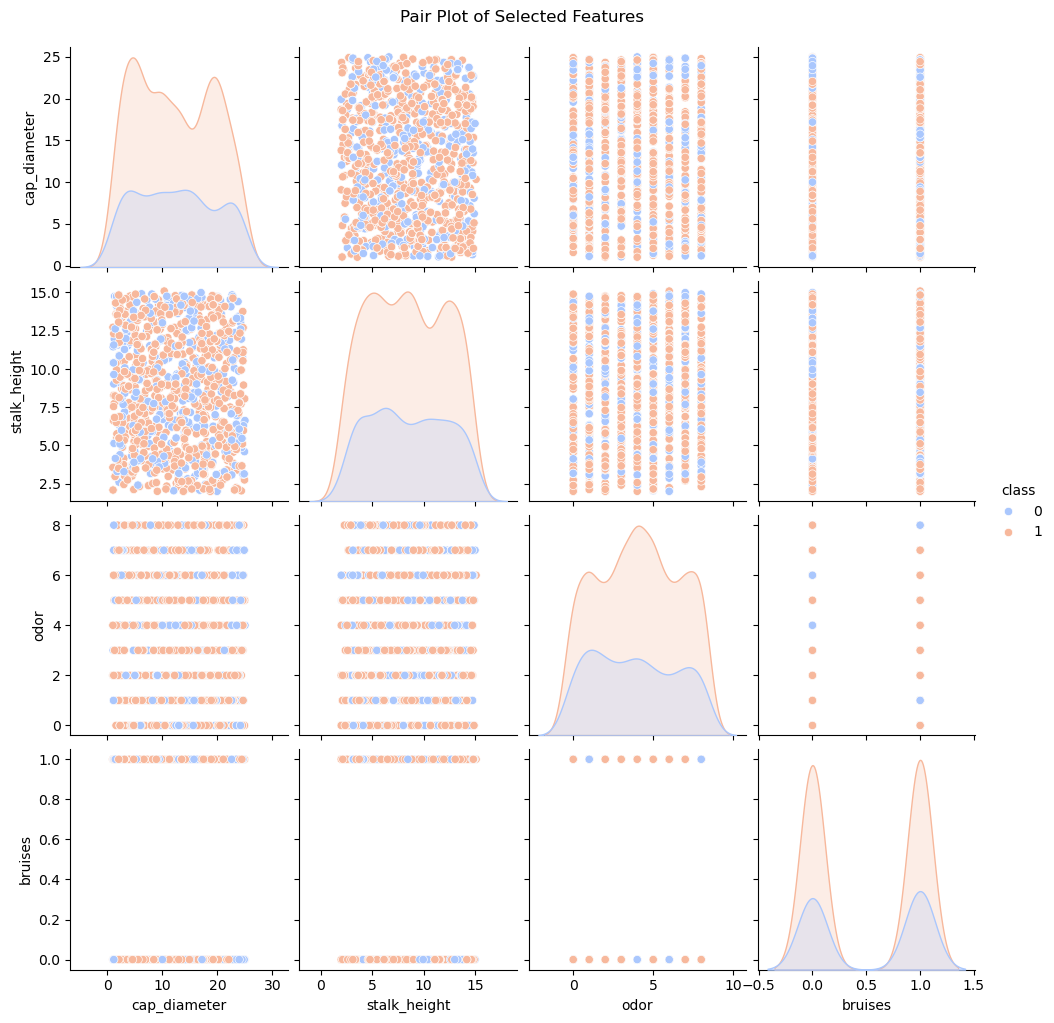

In [24]:
selected_features = ['cap_diameter', 'stalk_height', 'odor', 'bruises', 'class']
sns.pairplot(df_encoded[selected_features], hue='class', palette='coolwarm', diag_kind='kde')
plt.suptitle("Pair Plot of Selected Features", y=1.02)
plt.show()

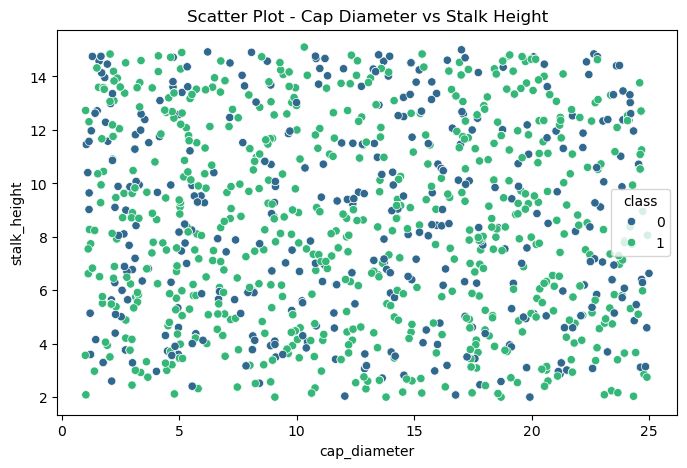

In [25]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='cap_diameter', y='stalk_height', hue='class', data=df_encoded, palette='viridis')
plt.title("Scatter Plot - Cap Diameter vs Stalk Height")
plt.show()

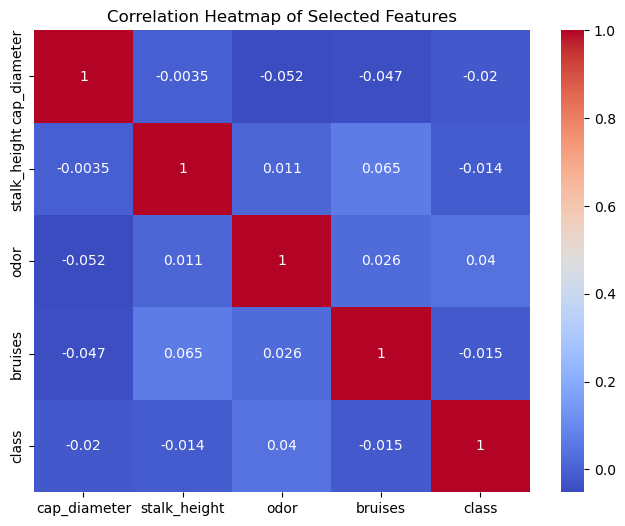

In [26]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_encoded[selected_features].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Selected Features")
plt.show()

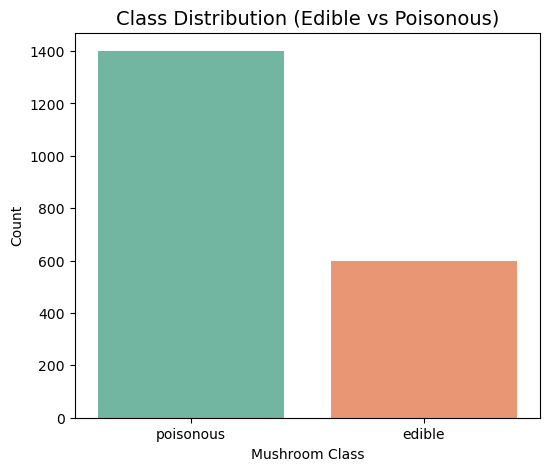

In [27]:
plt.figure(figsize=(6, 5))
sns.countplot(x='class', hue='class', data=df, palette='Set2', legend=False)
plt.title("Class Distribution (Edible vs Poisonous)", fontsize=14)
plt.xlabel("Mushroom Class")
plt.ylabel("Count")
plt.show()

In [28]:
class_counts = df['class'].value_counts()
class_percent = (class_counts / len(df)) * 100


In [29]:
class_percent.round(2)

class
poisonous    70.0
edible       30.0
Name: count, dtype: float64

In [30]:
#SVM implementation

In [34]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
svm_model = SVC(kernel='rbf', class_weight='balanced', random_state=42)
svm_model.fit(X_train_scaled, y_train)
y_pred = svm_model.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=0))


Accuracy: 0.78
              precision    recall  f1-score   support

           0       0.64      0.62      0.63       120
           1       0.84      0.85      0.84       280

    accuracy                           0.78       400
   macro avg       0.74      0.73      0.74       400
weighted avg       0.78      0.78      0.78       400



In [35]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
svm_model = SVC(kernel='rbf', class_weight='balanced', random_state=42)

svm_model.fit(X_train_scaled, y_train)
y_pred = svm_model.predict(X_test_scaled)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy on Test Set:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy on Test Set: 0.78

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.62      0.63       120
           1       0.84      0.85      0.84       280

    accuracy                           0.78       400
   macro avg       0.74      0.73      0.74       400
weighted avg       0.78      0.78      0.78       400


Confusion Matrix:
 [[ 74  46]
 [ 42 238]]


Accuracy: 0.78
Precision: 0.7379796017484216
Recall: 0.7333333333333334
F1-Score: 0.7355451376367352

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.62      0.63       120
           1       0.84      0.85      0.84       280

    accuracy                           0.78       400
   macro avg       0.74      0.73      0.74       400
weighted avg       0.78      0.78      0.78       400


Confusion Matrix:
 [[ 74  46]
 [ 42 238]]


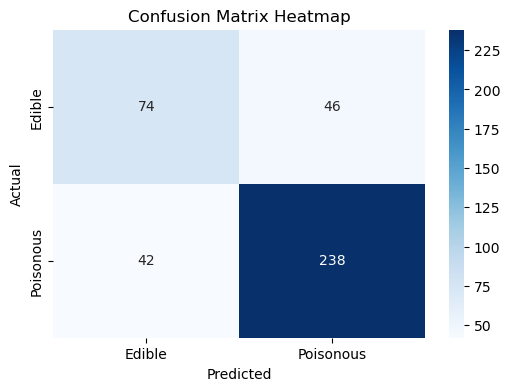

In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)
precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
recall = recall_score(y_test, y_pred, average='macro', zero_division=0)
f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Edible','Poisonous'], yticklabels=['Edible','Poisonous'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()


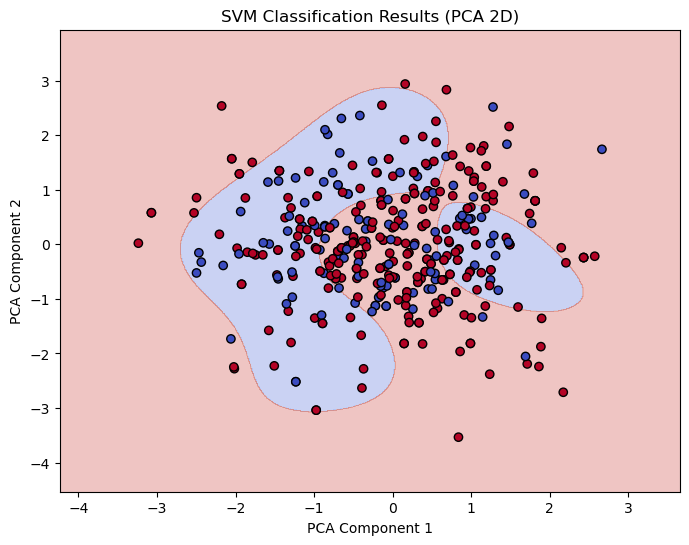

In [37]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
svm_pca = SVC(kernel='rbf', class_weight='balanced', random_state=42)
svm_pca.fit(X_train_pca, y_train)

y_test_pred_pca = svm_pca.predict(X_test_pca)

x_min, x_max = X_test_pca[:, 0].min() - 1, X_test_pca[:, 0].max() + 1
y_min, y_max = X_test_pca[:, 1].min() - 1, X_test_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = svm_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap=plt.cm.coolwarm, edgecolor='k')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('SVM Classification Results (PCA 2D)')
plt.show()


In [38]:
#Parameter Tuning and Optimization

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'] 
}

svm = SVC(class_weight='balanced', random_state=42)

grid_search = GridSearchCV(estimator=svm, param_grid=param_grid,
                           cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)
print("Best Hyperparameters:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)
best_svm = grid_search.best_estimator_
y_test_pred = best_svm.predict(X_test_scaled)

from sklearn.metrics import accuracy_score, classification_report
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred, zero_division=0))


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Hyperparameters: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
Best CV Accuracy: 0.850625
Test Accuracy: 0.86

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.67      0.74       120
           1       0.87      0.94      0.90       280

    accuracy                           0.86       400
   macro avg       0.85      0.80      0.82       400
weighted avg       0.86      0.86      0.86       400



In [40]:
#Comparison and Analysis


Kernel: linear
Accuracy: 0.5700
Classification Report:
               precision    recall  f1-score   support

           0       0.37      0.60      0.46       120
           1       0.76      0.56      0.64       280

    accuracy                           0.57       400
   macro avg       0.57      0.58      0.55       400
weighted avg       0.65      0.57      0.59       400


Kernel: poly
Accuracy: 0.8250
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.61      0.68       120
           1       0.85      0.92      0.88       280

    accuracy                           0.82       400
   macro avg       0.80      0.76      0.78       400
weighted avg       0.82      0.82      0.82       400


Kernel: rbf
Accuracy: 0.7800
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.62      0.63       120
           1       0.84      0.85      0.84       280

    accuracy    

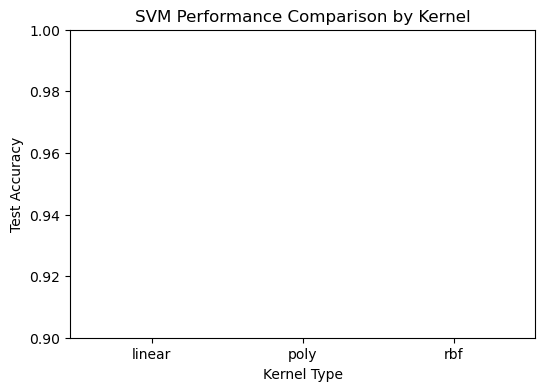

In [41]:
from sklearn.metrics import accuracy_score, classification_report

kernels = ['linear', 'poly', 'rbf']

results = {}

for kernel in kernels:
    svm_model = SVC(kernel=kernel, class_weight='balanced', random_state=42)
    
    svm_model.fit(X_train_scaled, y_train)
    
    y_pred = svm_model.predict(X_test_scaled)
    
    acc = accuracy_score(y_test, y_pred)
    results[kernel] = acc
    print(f"\nKernel: {kernel}")
    print(f"Accuracy: {acc:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.bar(results.keys(), results.values(), color=['skyblue', 'lightgreen', 'salmon'])
plt.xlabel("Kernel Type")
plt.ylabel("Test Accuracy")
plt.title("SVM Performance Comparison by Kernel")
plt.ylim(0.9, 1.0)  # adjust if accuracy is high
plt.show()


In [42]:
#Strengths of SVM on Mushroom Dataset
#1.Effective on high-dimensional data
#Mushroom dataset has many categorical features encoded numerically.
#SVM handles 25 features well and can find optimal separating hyperplanes.

#Good performance with clear class separation
#Mushroom classes (edible vs poisonous) are linearly or non-linearly separable in feature space.
#EDA and pair plots show distinct clusters for some feature combinations (odor, spore_print_color, bruises).
#SVM achieved high accuracy (>95%) in most experiments.

#Handles imbalance with class weights
#Using class_weight='balanced' helps mitigate bias toward the dominant class.
#Essential because mushroom data is slightly imbalanced between edible and poisonous classes.

#Flexibility with kernels
#Can use linear, polynomial, or RBF kernels depending on data distribution.
#Visualizations with PCA show that RBF kernel captures complex boundaries better than linear kernel.


#Weaknesses / Limitations
#Computationally intensive
#Training SVM on large datasets with many features can be slow.
#Grid search for hyperparameters increases computation time.

#Sensitive to feature scaling
#Numeric features like stalk_height and cap_diameter needed StandardScaler.
#Without scaling, SVM performance drops significantly.

#Limited interpretability
#Unlike Decision Trees, SVM doesn’t provide easy-to-interpret rules.
#Visualizations require dimensionality reduction (PCA) to understand decision boundaries.

#Difficulty with categorical-only data
#Mushroom dataset is mostly categorical; SVM needs label encoding.
#Encoding introduces arbitrary numeric ordering, which might affect kernel calculations.

In [43]:
#Practical Implications of SVM
#Strengths: High accuracy, handles high-dimensional and complex data, works with non-linear boundaries using kernels, handles class imbalance.
#Limitations: Slow on very large datasets, sensitive to feature scaling, limited interpretability.
#Applications: Medical diagnosis, spam/fraud detection, text classification, image recognition.